In [1]:
from os.path import join
from copy import deepcopy
from tqdm import tqdm as TQ

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline
sns.set_style('whitegrid');
plt.style.use('default-style');
np.set_printoptions(precision = 3, threshold = 15)

In [3]:
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder
)

In [4]:
import tensorflow as tf
print('Tensorflow Version: {}'.format(tf.__version__))

# check physical devices
tf.config.list_physical_devices()

Tensorflow Version: 2.3.1


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [5]:
# ignore specific warnings
import warnings
warnings.simplefilter("ignore", FutureWarning)

In [6]:
# https://www.analyticsvidhya.com/blog/2021/04/how-to-reduce-memory-usage-in-python-pandas/
# https://towardsdatascience.com/reducing-memory-usage-in-pandas-with-smaller-datatypes-b527635830af

calculateMemory = lambda frame : frame.memory_usage(deep = True).sum() / 1024 ** 2 # return usage in MB

def limitNumeric(frame : pd.DataFrame, verbose : bool = True, **kwargs) -> pd.DataFrame:
    """Given a DataFrame (frame) - the function considers each numeric columns (integer and/or float) and sets the data type to any of `np.dtypes` to Reduce Memory Usage"""
    
    if verbose:
        actual = calculateMemory(frame)
    
    frame = deepcopy(frame)
    
    # foreach column calculate the min and max value
    # and map the data to its relevant unit category - int8, int16, int32 or int64
    # by default - pandas treats each numeric column to its highest number base - int64/float64
    for col in TQ(frame.columns, desc = "converting dtypes"):
        c_min = frame[col].min()
        c_max = frame[col].max()
        
        if c_min > np.iinfo(np.int8).min and c_max <= np.iinfo(np.int8).max:
            frame[col] = frame[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max <= np.iinfo(np.int16).max:
            frame[col] = frame[col].astype(np.int16)
        if c_min > np.iinfo(np.int32).min and c_max <= np.iinfo(np.int32).max:
            frame[col] = frame[col].astype(np.int32)
        else:
            frame[col] = frame[col].astype(np.int64)
            
    if verbose:
        final = calculateMemory(frame)
        print(f"Actual Size : {actual:.2f} MB | Final Size : {final:.2f} MB || Reduction Ration = {((actual - final) / actual) * 100:.2f}%")
        
    return frame

def loadData(path : str, reduce_memory : bool = True, **kwargs) -> pd.DataFrame:
    """Load a CSV File into Memory, with Optional Arguments"""
    
    frame = pd.read_csv(path, **kwargs)
    
    if reduce_memory: # reduces the dtypes
        frame = limitNumeric(frame, **kwargs)
        
    return frame

In [7]:
TRAIN_DATA = join(".", "output", "train-100.csv")
EVALUATION_DATA = join(".", "output", "test-100.csv")

In [8]:
dataTrain = loadData(TRAIN_DATA)
dataTrain.sample(5)

converting dtypes: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:31<00:00,  2.01it/s]


Actual Size : 2777.21 MB | Final Size : 1388.60 MB || Reduction Ration = 50.00%


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,distanceHydro,distanceRoads,distanceFires,soil_type_count_r,soil_type_count_vs,soil_type_count_es,soil_type_count_s,soil_type_count_total,wilderness_area_count,Cover_Type
2661288,2922,59,6,350,42,107,218,251,145,318,...,352,2923,2939,0,0,1,1,1,1,2
3547928,2809,26,10,31,31,989,165,236,234,705,...,43,2978,2896,0,0,0,0,0,1,2
1897718,3244,280,18,78,31,2477,199,238,214,598,...,83,4081,3298,0,0,0,0,0,1,1
1960068,2812,325,15,274,-11,2022,249,230,164,1539,...,274,3463,3205,0,0,2,2,2,1,2
5557819,2953,114,39,97,111,981,181,209,184,7633,...,147,3111,8184,1,0,0,0,1,1,5


In [9]:
dataTest = loadData(EVALUATION_DATA)
dataTest.sample(5)

converting dtypes: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:05<00:00, 12.57it/s]


Actual Size : 480.65 MB | Final Size : 240.33 MB || Reduction Ration = 50.00%


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type40,distanceHydro,distanceRoads,distanceFires,soil_type_count_r,soil_type_count_vs,soil_type_count_es,soil_type_count_s,soil_type_count_total,wilderness_area_count
977834,2595,304,14,98,48,936,206,214,182,1689,...,0,109,2758,3096,0,0,0,0,0,0
623452,3276,24,5,187,0,2994,171,235,140,1310,...,0,187,4438,3528,0,0,0,0,0,0
284921,2728,169,15,48,43,2544,243,227,170,2755,...,1,64,3730,3877,0,0,1,1,1,0
97106,2669,48,18,26,93,1168,231,229,161,1571,...,0,96,2913,3097,0,0,0,0,0,1
819614,3575,48,17,470,1,4447,209,203,102,2304,...,0,470,5705,4253,0,0,0,0,0,0


In [10]:
# remove soil type 7 & 15
# https://www.kaggle.com/sumeetbohra/eda-feature-engineering-xgboost?scriptVersionId=82762447&cellId=11
dataTest.drop(columns = ["Soil_Type7" , "Soil_Type15"], inplace = True)
dataTrain.drop(columns = ["Soil_Type7" , "Soil_Type15"], inplace = True)

# remove feature 4 and re-train to check accuracy
dataTrain = dataTrain[dataTrain.Cover_Type != 5]

In [11]:
dataTrain.Cover_Type.value_counts()

2    2262087
1    1468136
7     391500
6     391500
4     391500
3     391500
Name: Cover_Type, dtype: int64

In [12]:
X = dataTrain.drop(columns = "Cover_Type")
y = dataTrain.Cover_Type

In [13]:
scaler = MinMaxScaler()
encoder = LabelEncoder()

In [14]:
XScaled = scaler.fit_transform(X)
yScaled = encoder.fit_transform(y)

In [15]:
INPUT_SHAPE = XScaled.shape[1]
OUTPUT_SHAPE = encoder.classes_.shape[0]

INPUT_SHAPE, OUTPUT_SHAPE

(61, 6)

In [49]:
initializer = tf.keras.initializers.LecunNormal()
regularizer = tf.keras.regularizers.l1_l2(l1 = 1e-4, l2 = 1e-3)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape = (INPUT_SHAPE, ), activation = "relu", name = "iLayer"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation = "softmax", name = "oLayer"),
], name = "DFC-1.0.0")

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, input_shape = (INPUT_SHAPE, ), activation = "relu", kernel_initializer = initializer, name = "iLayer"),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(128, activation = "relu", kernel_regularizer = regularizer),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(256, activation = "relu", kernel_regularizer = regularizer),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(64, activation = "relu", kernel_regularizer = regularizer),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(OUTPUT_SHAPE, activation = "softmax", name = "oLayer"),
# ], name = "DFC-1.1.0")

model.summary(line_length = 127)

Model: "DFC-1.0.0"
_______________________________________________________________________________________________________________________________
Layer (type)                                             Output Shape                                      Param #             
iLayer (Dense)                                           (None, 64)                                        3968                
_______________________________________________________________________________________________________________________________
dropout (Dropout)                                        (None, 64)                                        0                   
_______________________________________________________________________________________________________________________________
dense (Dense)                                            (None, 128)                                       8320                
_____________________________________________________________________________________

In [17]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy(name = "sparse")]
)

# model.compile(
#     optimizer = tf.keras.optimizers.Adam(lr = 1e-3),
#     loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False, name = "loss"),
#     metrics = [tf.keras.metrics.SparseTopKCategoricalAccuracy(k = 7, name = "topK"), tf.keras.metrics.SparseCategoricalAccuracy(name = "sparse")]
# )

In [18]:
history = model.fit(XScaled, yScaled, epochs = 10, batch_size = 512)

Epoch 1/10
10345/10345 [==============================] - 28s 3ms/step - loss: 1.1449 - sparse: 0.8982
Epoch 2/10
10345/10345 [==============================] - 28s 3ms/step - loss: 1.1171 - sparse: 0.9259
Epoch 3/10
10345/10345 [==============================] - 28s 3ms/step - loss: 1.1124 - sparse: 0.9306
Epoch 4/10
10345/10345 [==============================] - 29s 3ms/step - loss: 1.1096 - sparse: 0.9335
Epoch 5/10
10345/10345 [==============================] - 28s 3ms/step - loss: 1.1078 - sparse: 0.9353
Epoch 6/10
10345/10345 [==============================] - 28s 3ms/step - loss: 1.1063 - sparse: 0.9368
Epoch 7/10
10345/10345 [==============================] - 30s 3ms/step - loss: 1.1049 - sparse: 0.9382
Epoch 8/10
10345/10345 [==============================] - 29s 3ms/step - loss: 1.1043 - sparse: 0.9389
Epoch 9/10
10345/10345 [==============================] - 29s 3ms/step - loss: 1.1035 - sparse: 0.9395
Epoch 10/10
10345/10345 [==============================] - 29s 3ms/step -

In [53]:
history.history.keys()

dict_keys(['loss', 'topK', 'sparse'])

In [ ]:
fig, axs = plt.subplots(1, 2)

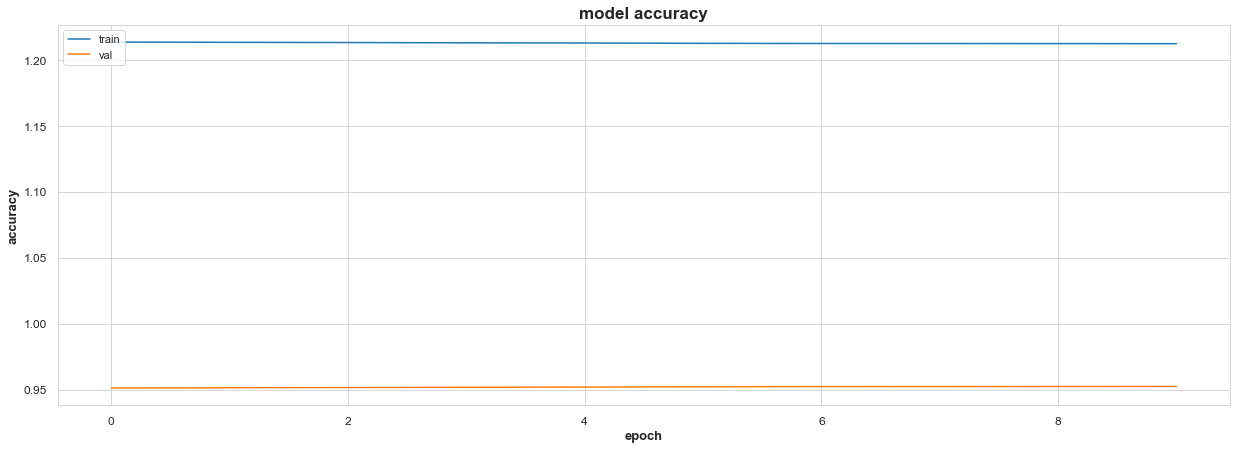

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
testScaled = scaler.transform(dataTest)

yPredicted = model.predict(testScaled)
yPredictedMax = [np.argmax(i) + 1 for i in yPredicted]

# DFC-1.0.0
output = pd.DataFrame({
    "Id" : range(4000000, 4000000 + len(yPredictedMax)),
    "Cover_Type" : yPredictedMax
})

output.sample(5)

,Id,Cover_Type
5333,4005333,1
976010,4976010,1
710212,4710212,2
270378,4270378,1
624912,4624912,3


In [20]:
output.to_csv("dfc100-4.csv", index = False)